<a href="https://colab.research.google.com/github/sgulyano/CMKL41-685/blob/main/41_685lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMKL41-685 Computer Vision Lab 1

CMKL University

By Sarun Gulyanon


### Goal

Introduce students to the essential programming tools and frameworks for modern computer vision.

### Outline

In this lab, students will explore classical computer vision with OpenCV and build deep learning models in TensorFlow/Keras and PyTorch.

0. Setup & Environment Check
1. OpenCV
2. TensorFlow/Keras
3. PyTorch

### References
- OpenCV: https://docs.opencv.org/5.x/d9/df8/tutorial_root.html
- TensorFlow/Keras: https://www.tensorflow.org/tutorials/images
- PyTorch: https://docs.pytorch.org/tutorials/
- TorchVision Models: https://docs.pytorch.org/vision/stable/index.html

----

## 0. Setup & Environment Check

In [1]:
import cv2
import numpy as np
import matplotlib
import tensorflow as tf
import torch
import torchvision

print("OpenCV:", cv2.__version__)
print("Matplotlib:", matplotlib.__version__)
print("TensorFlow:", tf.__version__)
print("TF GPU:", tf.config.list_physical_devices('GPU'))
print("PyTorch:", torch.__version__)
print("Torch CUDA available:", torch.cuda.is_available())
print("Torchvision:", torchvision.__version__)

OpenCV: 4.12.0
Matplotlib: 3.10.0
TensorFlow: 2.19.0
TF GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
PyTorch: 2.6.0+cu124
Torch CUDA available: True
Torchvision: 0.21.0+cu124


## 1. OpenCV

OpenCV is an open-source computer vision library that provides tools for image and video processing.

The first example creates a synthetic dark-gray image with a green circle and the text "OpenCV," and displays it using Matplotlib.

(np.float64(-0.5), np.float64(319.5), np.float64(239.5), np.float64(-0.5))

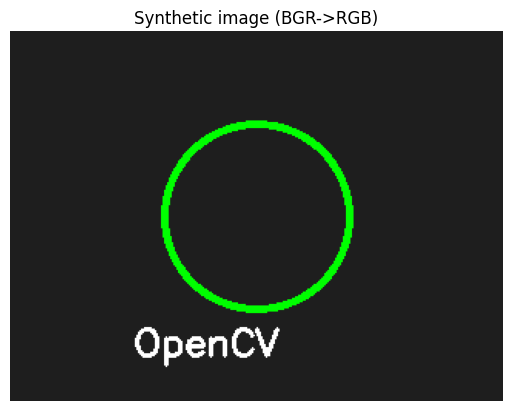

In [2]:
import matplotlib.pyplot as plt

# Create a synthetic image (since external I/O may be restricted)
img = np.zeros((240, 320, 3), dtype=np.uint8)
img[:] = (30, 30, 30)
cv2.circle(img, (160, 120), 60, (0, 255, 0), thickness=3)
cv2.putText(img, "OpenCV", (80, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

# Convert BGR->RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.title("Synthetic image (BGR->RGB)")
plt.axis("off")

This code reads an image file using OpenCV and display in Matplotlib.

In [3]:
!wget https://i.pinimg.com/1200x/3b/37/cd/3b37cd80d4f092ed392b1453b64cf0d0.jpg -O sample.jpg

--2025-08-19 07:16:20--  https://i.pinimg.com/1200x/3b/37/cd/3b37cd80d4f092ed392b1453b64cf0d0.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.209.46.97, 23.209.46.78, 2600:1413:a000::172e:10bd, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.209.46.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59725 (58K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  58.33K  --.-KB/s    in 0.001s  

2025-08-19 07:16:20 (43.5 MB/s) - ‘sample.jpg’ saved [59725/59725]



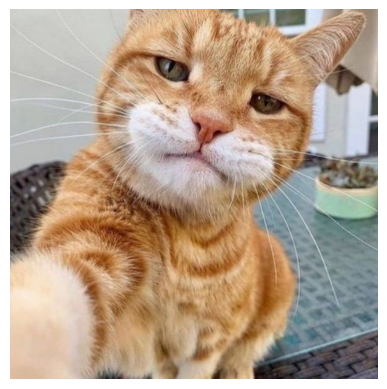

In [4]:
# Read the downloaded image
cat = cv2.imread("sample.jpg")

# Convert BGR->RGB for matplotlib display
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(cat_rgb)
plt.axis("off")
plt.show()

This code applies two common image processing techniques, bluring and edge detection, using OpenCV.

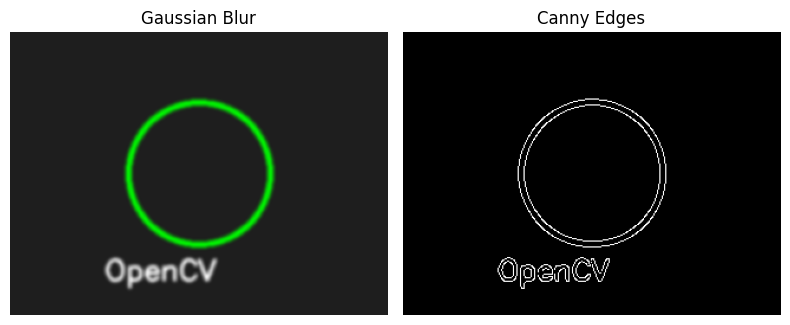

In [5]:
blur = cv2.GaussianBlur(img, (7,7), 1.5)
edges = cv2.Canny(img, 50, 150)

fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)); plt.title("Gaussian Blur"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Canny Edges"); plt.axis("off")
fig.tight_layout()

## 2. TensorFlow/Keras

TensorFlow is an open-source library for building and training machine learning and deep learning models.

In this example, we will use [MobileNetV2](https://arxiv.org/abs/1801.04381) to classify an input image and predict its most likely object categories.

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [7]:
# Load pretrained model
tf_model = MobileNetV2(weights="imagenet")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
tf_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [9]:
img_path = "sample.jpg"  # change to your image path
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
x = image.img_to_array(img)

# Add batch dimension
x = np.expand_dims(x, axis=0)

# Preprocess for MobileNet
x = preprocess_input(x)

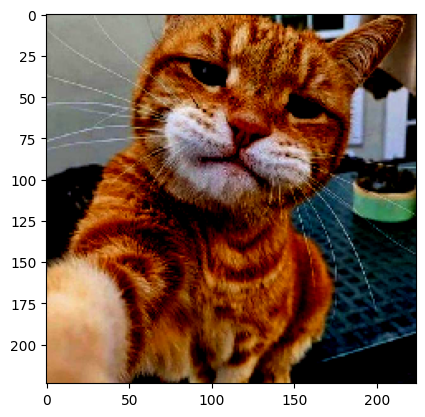

In [10]:
plt.imshow(x.squeeze())

In [11]:
preds = tf_model.predict(x)

# Decode top-3 predictions
print("Predicted:")
for _, name, val in decode_predictions(preds, top=3)[0]:
    print(f"{name}: {val:0.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
tabby: 0.48
tiger_cat: 0.19
Egyptian_cat: 0.03


## 3. PyTorch

PyTorch is another popular open-source deep learning framework developed by Facebook's AI Research (FAIR) lab.

In this example, we will use [MobileNetV2](https://arxiv.org/abs/1801.04381) for image classification again but using PyTorch instead of TensorFlow.

In [12]:
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

In [13]:
# Load pretrained MobileNetV2
pt_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
pt_model.eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 130MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [14]:
# ImageNet mean and std
preprocess = transforms.Compose([
    transforms.Resize(256),              # resize shorter side to 256
    transforms.CenterCrop(224),          # center crop to 224x224
    transforms.ToTensor(),               # convert to tensor (0–1)
    transforms.Normalize(                # normalize using ImageNet stats
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [15]:
img = Image.open('sample.jpg')

# Preprocess
input_tensor = preprocess(img).unsqueeze(0)  # add batch dimension

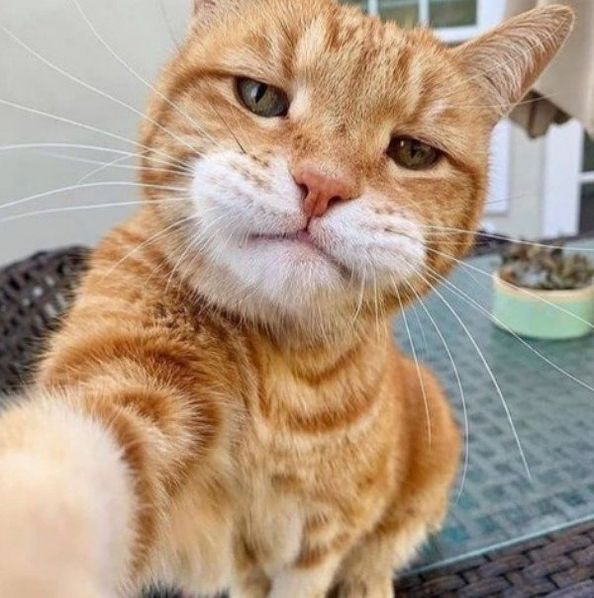

In [16]:
img

In [17]:
with torch.no_grad():
    output = pt_model(input_tensor)

# Get top-3 predictions
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top3_prob, top3_catid = torch.topk(probabilities, 3)

In [18]:
categories = models.MobileNet_V2_Weights.IMAGENET1K_V1.meta["categories"]

# Decode top-3 predictions
print("Predicted:")
for i in range(top3_prob.size(0)):
    print(f"{categories[top3_catid[i]]}: {float(top3_prob[i]):0.2f}")

Predicted:
tiger cat: 0.62
tabby: 0.27
Egyptian cat: 0.07


----